<a href="https://colab.research.google.com/github/MartRideratGamaGama/Classificatio-on-CIFAR10-with-CNN/blob/main/Try_Classification_Myself_(using_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ref from

https://github.com/python-engineer/pytorchTutorial

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Config device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
# Set Hyper Parameter

num_epoch = 100
batch_size = 4
learning_rate = 0.001

In [4]:
# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]

tranform = transforms.Compose( [transforms.ToTensor(), 
                                transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

In [5]:
# CIFAR10: 60000 32x32 color images 
#10 classes with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root = './data', train = True,
                                             download = True, transform =tranform)

test_dataset = torchvision.datasets.CIFAR10(root = './data', train = False,
                                             download = True, transform =tranform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [6]:
print(train_dataset)
print(test_dataset)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


In [7]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

In [8]:
print(train_loader)

In [9]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [10]:
# show image

def imshow(img):
    img = img/2+0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

In [11]:
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

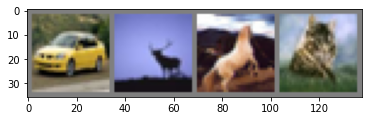

In [12]:
# show images
imshow(torchvision.utils.make_grid(images))

In [13]:
#Create CONV net
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__() #Define layer each class
        self.conv1 = nn.Conv2d(3,6,5) #(Input Channel, Output Channel, Kernel Size)
        self.pool = nn.MaxPool2d(2,2) #Max Pooling Layer 2x2
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120) #(Input, Output)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10) #(Input, predict class)

    def forward(self, x):
        # n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14 #Conv1 with activation function ReLu than go max pooling
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # End with fully connected to predict class
        return x

model = ConvNet().to(device)

In [25]:
#Model Structure
print(model)

ConvNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [14]:
criterion = nn.CrossEntropyLoss() #Loss using Cross Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) # Optimizer using SGD

In [15]:
n_total_steps = len(train_loader)

In [16]:
#Training
for epoch in range(num_epoch):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward propagation
        output = model(images) #predict training
        loss = criterion(output, labels) #calculate loss, compare prediction to actual

        # Backpropagation
        optimizer.zero_grad() #clear previous gradient or it will add more gradient
        loss.backward() #Doing Backpropagation with calculated gradient
        optimizer.step() #update step and parameter for us

        if (i+1)%100 ==0:
            print(f"Epoch: {epoch+1}/{num_epoch}/ Step: {i+1}/{n_total_steps}, Loss: {loss.item():.4f}")
print("Finished Training")

PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

Streaming output truncated to the last 5000 lines.
Epoch: 61/100/ Step: 200/12500, Loss: 0.6728
Epoch: 61/100/ Step: 300/12500, Loss: 0.1674
Epoch: 61/100/ Step: 400/12500, Loss: 0.1281
Epoch: 61/100/ Step: 500/12500, Loss: 0.3621
Epoch: 61/100/ Step: 600/12500, Loss: 0.7671
Epoch: 61/100/ Step: 700/12500, Loss: 0.1927
Epoch: 61/100/ Step: 800/12500, Loss: 0.0590
Epoch: 61/100/ Step: 900/12500, Loss: 0.5744
Epoch: 61/100/ Step: 1000/12500, Loss: 0.3019
Epoch: 61/100/ Step: 1100/12500, Loss: 0.4274
Epoch: 61/100/ Step: 1200/12500, Loss: 0.1855
Epoch: 61/100/ Step: 1300/12500, Loss: 0.1186
Epoch: 61/100/ Step: 1400/12500, Loss: 0.0617
Epoch: 61/100/ Step: 1500/12500, Loss: 0.1744
Epoch: 61/100/ Step: 1600/12500, Loss: 0.3509
Epoch: 61/100/ Step: 1700/12500, Loss: 0.3619
Epoch: 61/100/ Step: 1800/12500, Loss: 0.1886
Epoch: 61/100/ Step: 1900/12500, Loss: 0.0149
Epoch: 61/100/ Step: 2000/12500, Loss: 0.1675
Epoch: 61/100/ Step: 2100/12500, Loss: 0.0610
Epoch: 61/100/ Step: 2200/12500, Loss

In [18]:
#Testing
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)] #We have 10 class so range = 10
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images) #Begin predict
        # max returns (value, index)
        _, predicted = torch.max(outputs,1) #get predicted
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] +=1
            n_class_samples[label] +=1

    #Calculate ACC
    acc = 100.0 * n_correct/n_samples
    print(f'Accuracy of this CNN: {acc}%')

    for i in range(10): #Check acc for each class
        acc = 100.0 * n_class_correct[i]/n_class_samples[i]
        print(f'Accuracy of class {classes[i]}: {acc}%')

Accuracy of this CNN: 61.06%
Accuracy of class plane: 67.4%
Accuracy of class car: 73.7%
Accuracy of class bird: 48.5%
Accuracy of class cat: 39.6%
Accuracy of class deer: 51.2%
Accuracy of class dog: 49.3%
Accuracy of class frog: 77.7%
Accuracy of class horse: 60.6%
Accuracy of class ship: 69.9%
Accuracy of class truck: 72.7%
